In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#Carga de dataset
data = pd.read_csv('/content/DatosTransporte.csv', sep=';')

In [4]:
print(data)

     FECHA     ORIGEN              DESTINO  DISTANCIA DESTINO  \
0    3-ene  B/BERMEJA            CARTAGENA             1338.0   
1    3-ene  B/BERMEJA            CARTAGENA             1338.0   
2    3-ene  B/BERMEJA            CARTAGENA             1338.0   
3    3-ene  B/BERMEJA            LA PUTANA              100.0   
4    4-ene  B/BERMEJA            CARTAGENA             1338.0   
..     ...        ...                  ...                ...   
381  4-may  B/BERMEJA  SAN JUAN NEPOMUCENO             1372.0   
382  4-may  B/BERMEJA            CARTAGENA             1338.0   
383  4-may  B/BERMEJA     ARROYO DE PIEDRA             1340.0   
384  5-may  B/BERMEJA               TANGUA             2204.0   
385  5-may  B/BERMEJA               TANGUA             2204.0   

     CONSUMO ACPM DESTINO e ODOM INICIAL ODOM FINAL DISTANCIA RECORRIDA  \
0                       160       120829     121749                 920   
1                       160      1051479    1052855                13

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FECHA                   386 non-null    object 
 1   ORIGEN                  386 non-null    object 
 2   DESTINO                 386 non-null    object 
 3   DISTANCIA DESTINO       373 non-null    float64
 4   CONSUMO ACPM DESTINO e  386 non-null    int64  
 5   ODOM INICIAL            379 non-null    object 
 6   ODOM FINAL              381 non-null    object 
 7   DISTANCIA RECORRIDA     386 non-null    object 
 8   AUDITORIA DISTANCIA     386 non-null    object 
 9   CANTIDAD CARGADA        381 non-null    object 
 10  CANTIDAD DESCARGADA     373 non-null    object 
 11  DIFERENCIA              378 non-null    object 
 12  TIEMPO DE CARGUE        386 non-null    object 
 13  TIEMPO MUERTO           386 non-null    object 
 14  TIEMPO EN EL VIAJE      386 non-null    ob

In [6]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [7]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [8]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [9]:
#resultado
print(data)

     FECHA  ORIGEN  DESTINO  DISTANCIA DESTINO  CONSUMO ACPM DESTINO e  \
0       74       0        7             1338.0                     160   
1       74       0        7             1338.0                     160   
2       74       0        7             1338.0                     160   
3       74       0       12              100.0                      23   
4       84       0        7             1338.0                     160   
..     ...     ...      ...                ...                     ...   
381     87       0       20             1372.0                     145   
382     87       0        7             1338.0                     160   
383     87       0        1             1340.0                     170   
384     92       0       21             2204.0                     356   
385     92       0       21             2204.0                     356   

     ODOM INICIAL  ODOM FINAL  DISTANCIA RECORRIDA  AUDITORIA DISTANCIA  \
0              28          26       

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FECHA                   386 non-null    int64  
 1   ORIGEN                  386 non-null    int64  
 2   DESTINO                 386 non-null    int64  
 3   DISTANCIA DESTINO       373 non-null    float64
 4   CONSUMO ACPM DESTINO e  386 non-null    int64  
 5   ODOM INICIAL            386 non-null    int64  
 6   ODOM FINAL              386 non-null    int64  
 7   DISTANCIA RECORRIDA     386 non-null    int64  
 8   AUDITORIA DISTANCIA     386 non-null    int64  
 9   CANTIDAD CARGADA        386 non-null    int64  
 10  CANTIDAD DESCARGADA     386 non-null    int64  
 11  DIFERENCIA              386 non-null    int64  
 12  TIEMPO DE CARGUE        386 non-null    int64  
 13  TIEMPO MUERTO           386 non-null    int64  
 14  TIEMPO EN EL VIAJE      386 non-null    in

In [22]:
#llenar datos vacios
columnas_especificas = ['DISTANCIA DESTINO','DIAS DE VIAJE','PEAJES RUTA']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FECHA                   386 non-null    int64  
 1   ORIGEN                  386 non-null    int64  
 2   DESTINO                 386 non-null    int64  
 3   DISTANCIA DESTINO       386 non-null    float64
 4   CONSUMO ACPM DESTINO e  386 non-null    int64  
 5   ODOM INICIAL            386 non-null    int64  
 6   ODOM FINAL              386 non-null    int64  
 7   DISTANCIA RECORRIDA     386 non-null    int64  
 8   AUDITORIA DISTANCIA     386 non-null    int64  
 9   CANTIDAD CARGADA        386 non-null    int64  
 10  CANTIDAD DESCARGADA     386 non-null    int64  
 11  DIFERENCIA              386 non-null    int64  
 12  TIEMPO DE CARGUE        386 non-null    int64  
 13  TIEMPO MUERTO           386 non-null    int64  
 14  TIEMPO EN EL VIAJE      386 non-null    in

In [11]:
# Generar un nuevo dataset con la columna movida
nuevo_dataset = data.copy()

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_dataset.to_csv('datos_transporte2.csv', index=False)

print("Archivo 'datos_transporte2.csv' creado exitosamente.")

Archivo 'datos_transporte2.csv' creado exitosamente.


In [12]:
# Lectura de Datos
X = data.iloc[:, :27]
y = data.iloc[:, 27]
m = y.size

In [13]:
print(X)
print('*'*25)
print(y)

     FECHA  ORIGEN  DESTINO  DISTANCIA DESTINO  CONSUMO ACPM DESTINO e  \
0       74       0        7             1338.0                     160   
1       74       0        7             1338.0                     160   
2       74       0        7             1338.0                     160   
3       74       0       12              100.0                      23   
4       84       0        7             1338.0                     160   
..     ...     ...      ...                ...                     ...   
381     87       0       20             1372.0                     145   
382     87       0        7             1338.0                     160   
383     87       0        1             1340.0                     170   
384     92       0       21             2204.0                     356   
385     92       0       21             2204.0                     356   

     ODOM INICIAL  ODOM FINAL  DISTANCIA RECORRIDA  AUDITORIA DISTANCIA  \
0              28          26       

In [14]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [15]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     FECHA  ORIGEN  DESTINO  DISTANCIA DESTINO  CONSUMO ACPM DESTINO e  \
0       74       0        7             1338.0                     160   
1       74       0        7             1338.0                     160   
2       74       0        7             1338.0                     160   
3       74       0       12              100.0                      23   
4       84       0        7             1338.0                     160   
..     ...     ...      ...                ...                     ...   
381     87       0       20             1372.0                     145   
382     87       0        7             1338.0                     160   
383     87       0        1             1340.0                     170   
384     92       0       21             2204.0                     356   
385     92       0       21             2204.0                     356   

     ODOM INICIAL  ODOM FINAL  DISTANCIA RECORRIDA  AUDITORIA DISTANCIA  \
0              28          26       

In [16]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [17]:
print(X)

[[ 1.          0.57098894 -0.16798208 ... -0.20113604 -0.93147278
  -1.1164208 ]
 [ 1.          0.57098894 -0.16798208 ... -0.20113604 -0.93147278
  -0.1570427 ]
 [ 1.          0.57098894 -0.16798208 ... -0.20113604  1.41049941
  -1.1164208 ]
 ...
 [ 1.          0.99825146 -0.16798208 ...  6.8143921   2.16885231
  -0.33470531]
 [ 1.          1.1625832  -0.16798208 ...  6.8143921   1.87889385
   1.22872567]
 [ 1.          1.1625832  -0.16798208 ...  6.8143921   0.31757906
   1.90384359]]


In [30]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [31]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
El valor predecido es (usando el descenso por el gradiente): nan


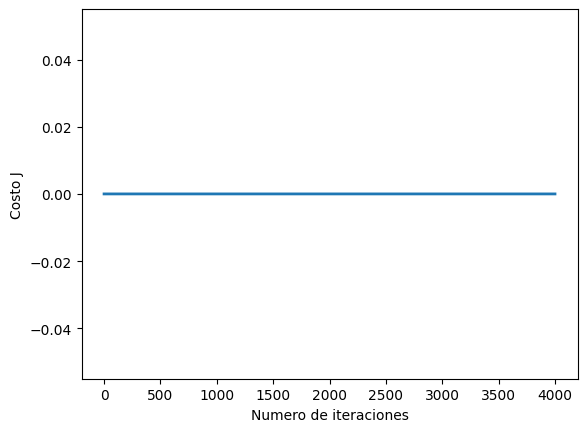

In [32]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(28)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un costo de un transporte con distintas caracteristicas
X_array = [1, 2, 130, 32, 1, 17, 1.48, 29, 4, 12, 15, 1, 1,4,16,35,120,73,10,2,17,8,9,31,50,80,11,5]
X_array[1:28] = (X_array[1:28] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))